In [2]:
import tifffile as tiff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import glob
import motmetrics as mm
from tqdm import tqdm
import multiprocessing
import imageio as iio
import seaborn as sns
import cv2

In [3]:
mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = False
# mpl.rcParams["savefig.bbox_inches"] = "tight"
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
# Try Arial first, but fall back to a common alternative
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans", "Helvetica", "sans-serif"]
mpl.rcParams["axes.titlesize"] = "xx-large"
# mpl.style.use("ggplot")
# mpl.style.use("seaborn-paper")
mpl.style.use("seaborn-v0_8-deep")
figure_size = (4,6)
sns.set_context("paper")

## Animal performance plots

In [6]:
data_path = "./data/animals-switches-main.csv"
df = pd.read_csv(data_path)

/tmp/ipykernel_4160321/1315322868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='method', y='value', data=df,
/tmp/ipykernel_4160321/1315322868.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([label.get_text().replace(" ", "\n") for label in plt.gca().get_xticklabels()])


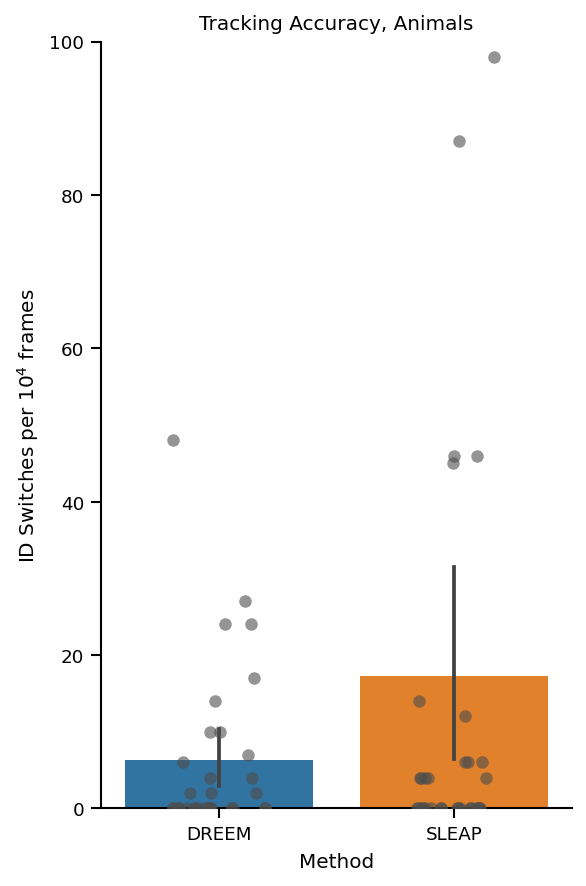

In [7]:
plt.figure(figsize=figure_size)
sns.stripplot(x='method', y='value', data=df, color="0.3", alpha=0.6, size=6, jitter=0.2)
sns.barplot(x='method', y='value', data=df,
            palette={
                "DREEM": sns.color_palette("tab20")[0],
            "SLEAP": sns.color_palette("tab20")[2]})

# Customize the plot
plt.title('Tracking Accuracy, Animals')
plt.xlabel('Method')
plt.ylabel('ID Switches per $10^4$ frames')
plt.ylim(0, 100)
plt.gca().set_xticklabels([label.get_text().replace(" ", "\n") for label in plt.gca().get_xticklabels()])
plt.tight_layout()
sns.despine()
# plt.savefig('./data/animals-switches-main.png', format='png')
plt.show()

### Animals split out

In [32]:
data_path = "./data/animals-switches-split-all.csv"
df = pd.read_csv(data_path)

/tmp/ipykernel_4160321/783656320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/783656320.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


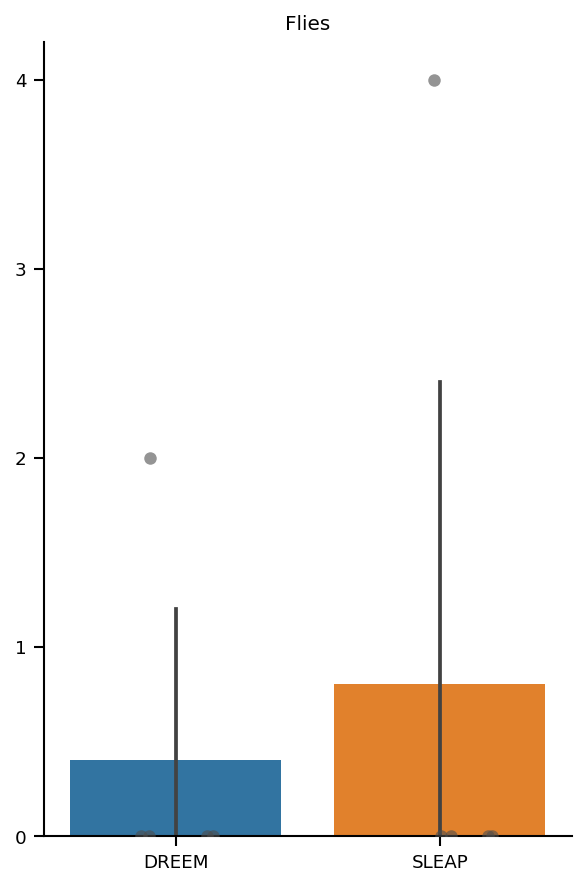

/tmp/ipykernel_4160321/783656320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/783656320.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


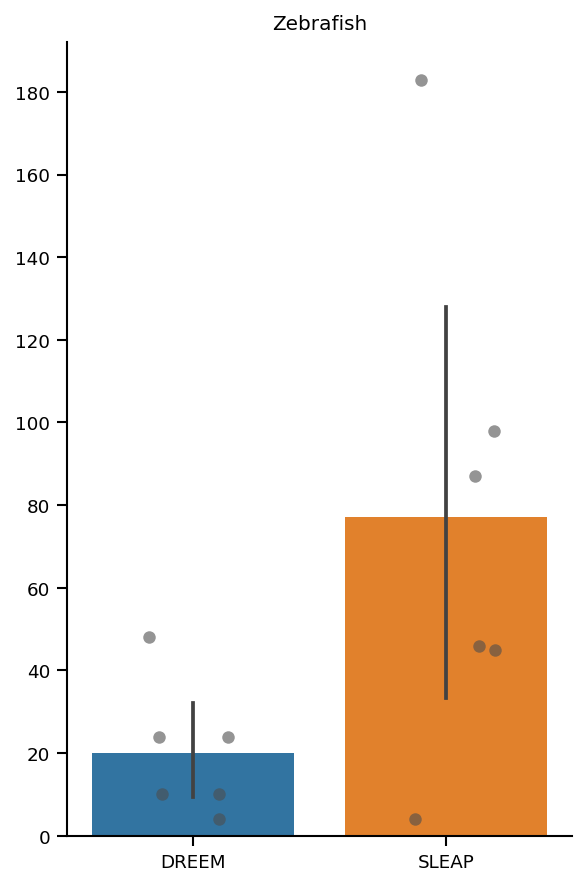

/tmp/ipykernel_4160321/783656320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/783656320.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


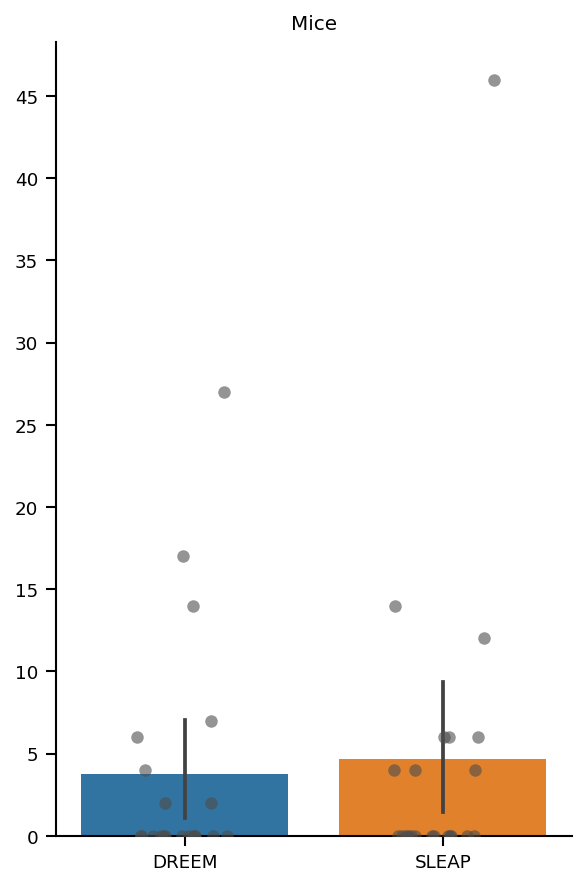

In [33]:
# Create a separate plot for each unique ID
unique_ids = df['id'].unique()
df = df.sort_values('method')

for animal_id in unique_ids:
    animal_data = df[df['id'] == animal_id]
    
    # Create a new figure for each animal
    fig, ax = plt.subplots(figsize=figure_size)
    
    sns.stripplot(x='method', y='value', data=animal_data, color="0.3", alpha=0.6, size=6, jitter=0.2, ax=ax)
    sns.barplot(
        x='method', y='value', data=animal_data,
        palette={
            "DREEM": sns.color_palette("tab20")[0],
            "SLEAP": sns.color_palette("tab20")[2]
        },
        ax=ax
    )
    
    ax.set_title(f'{animal_id}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])
    # Set integer y-axis ticks
    from matplotlib.ticker import MaxNLocator
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.tight_layout()
    sns.despine()
    plt.show()

    # plt.savefig(f'./data/animals-switches-split-chunk-{animal_id}.png', format='png')

## Sample Efficiency

In [12]:
data_path = "./data/sample-efficiency-switches.csv"
df = pd.read_csv(data_path)

In [17]:
df['n_chunks'] = df['n_chunks'].astype(str)
# Define the order for n_chunks
chunk_order = ['10', '50', '500', '1000']

# Convert n_chunks to categorical with the specified order
df['n_chunks'] = pd.Categorical(
    df['n_chunks'],
    categories=chunk_order,
    ordered=True
)

/tmp/ipykernel_4160321/4293766911.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


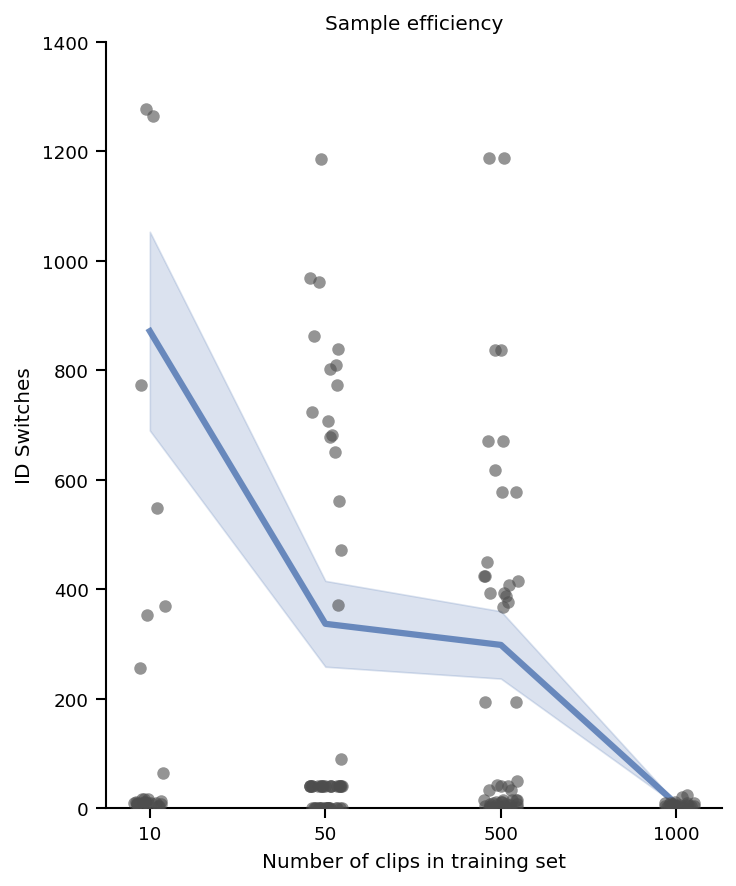

In [ ]:
# Assuming df_melt is already defined as in your previous code
fig = plt.figure(figsize=(5,6))

# plots
sns.stripplot(
        x='n_chunks', 
        y='value', 
        data=df, 
        color="0.3", 
        alpha=0.6, 
        size=6,
    )
sns.lineplot(
    x='n_chunks', 
    y='value', 
    data=df, 
    palette=sns.color_palette("tab20")[0],
    linewidth=3,
    alpha=0.8, 
    errorbar="se", 
)

plt.title('Sample efficiency')
plt.xlabel('Number of clips in training set')
plt.ylabel('ID Switches')
plt.ylim(0, 1400)
plt.tight_layout()
sns.despine()
# plt.savefig('./data/sample-efficiency.png', format='png')
plt.show()

### Generalization to number of instances

In [19]:
data_path = "./data/best-v1-pretrained-vs-sleap-num-instances-switches-chunks.csv"
df = pd.read_csv(data_path)

/tmp/ipykernel_4160321/3940753708.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:0.3'` for the same effect.

  sns.stripplot(


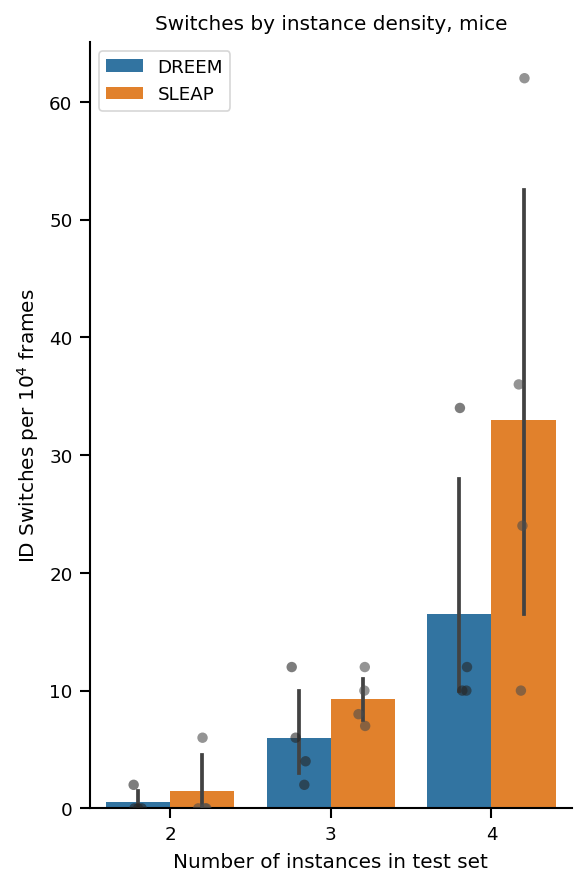

In [21]:
plt.figure(figsize=figure_size)

sns.stripplot(
    x='test_num_instances',
    y='value',
    data=df,
    hue='model', 
    dodge=True,
    color="0.3",
    legend=False,
    alpha=0.6,
    size=5,
)

g = sns.barplot(
    x='test_num_instances',
    y='value',
    data=df,
    hue='model',
    palette={
        str(df["model"].unique()[0]): sns.color_palette("tab20")[0], 
        str(df["model"].unique()[1]): sns.color_palette("tab20")[2]
    }
)
g.legend_.set_title(None)

# Customize the plot
plt.title('Switches by instance density, mice')
plt.xlabel('Number of instances in test set')
plt.ylabel('ID Switches per 10$^{4}$ frames')
plt.tight_layout()
sns.despine()
# plt.savefig('./data/dreem-vs-sleap-num-instances-switches.png', format='png')
plt.show()

## Microscopy performance plots

In [22]:
data_path = "/root/vast/mustafa/dreem-experiments/paper-plots/performance/switches/microscopy-switches.csv"
df = pd.read_csv(data_path)

/tmp/ipykernel_4160321/2543064825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='method', y='value', data=df,


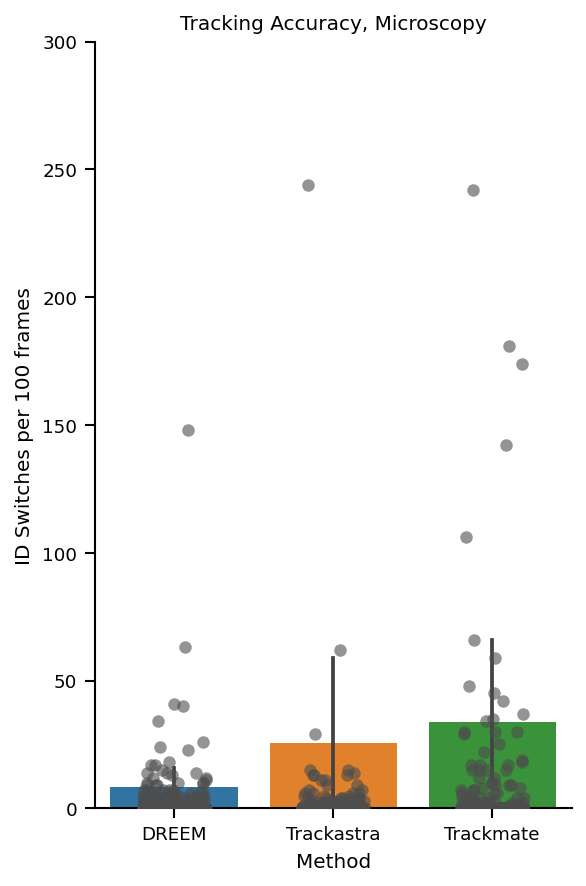

In [24]:
fig1, ax1 = plt.subplots(figsize=figure_size)

sns.stripplot(x='method', y='value', data=df, color="0.3", alpha=0.6, size=6, jitter=0.2)
sns.barplot(x='method', y='value', data=df,
            palette={
            "DREEM": sns.color_palette("tab10")[0],
            "Trackastra": sns.color_palette("tab10")[1],
            "Trackmate": sns.color_palette("tab10")[2]
            }, 
        errorbar="ci"
            )

plt.title('Tracking Accuracy, Microscopy') 
plt.xlabel('Method')
plt.ylabel('ID Switches per 100 frames')
ax1.set_ylim(0, 300)
sns.despine(ax=ax1)
plt.tight_layout()
# plt.savefig('./data/microscopy-switches.png', format='png')
plt.show()

### Split out by dataset

In [36]:
data_path = "./data/microscopy-switches-split-all.csv"
df = pd.read_csv(data_path)

/tmp/ipykernel_4160321/1924689798.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/1924689798.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


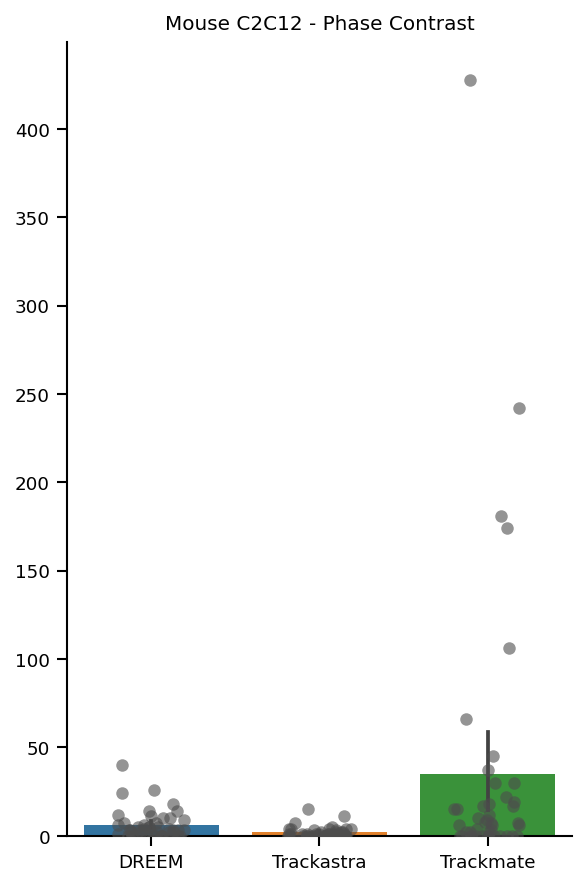

/tmp/ipykernel_4160321/1924689798.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/1924689798.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


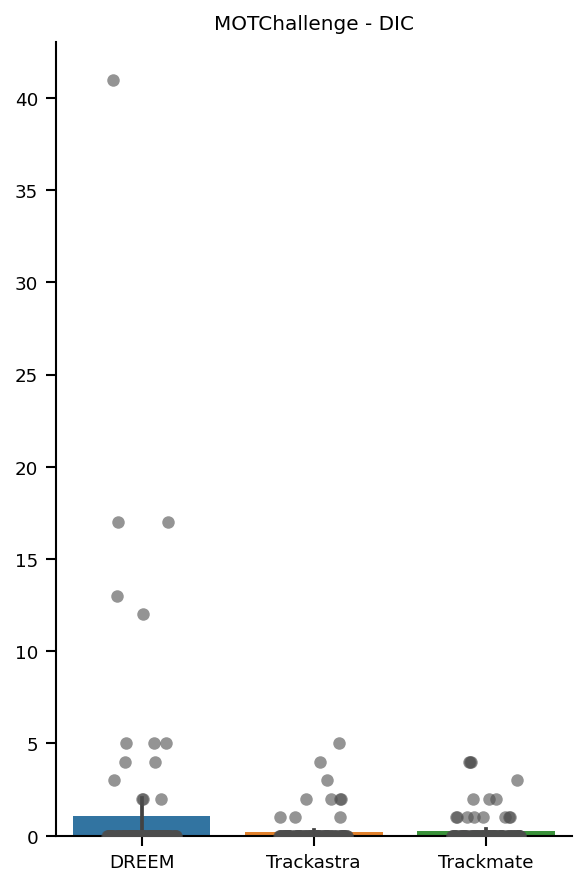

/tmp/ipykernel_4160321/1924689798.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/1924689798.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


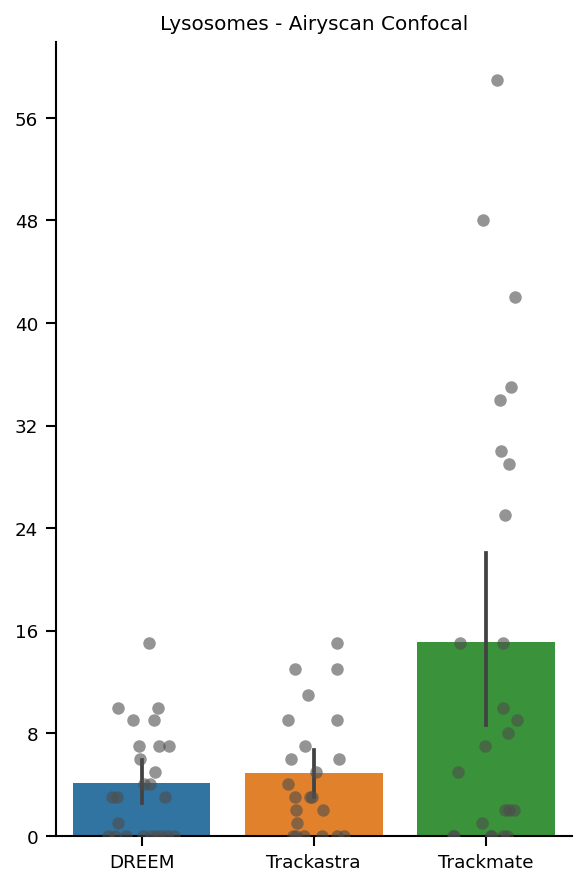

/tmp/ipykernel_4160321/1924689798.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4160321/1924689798.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])


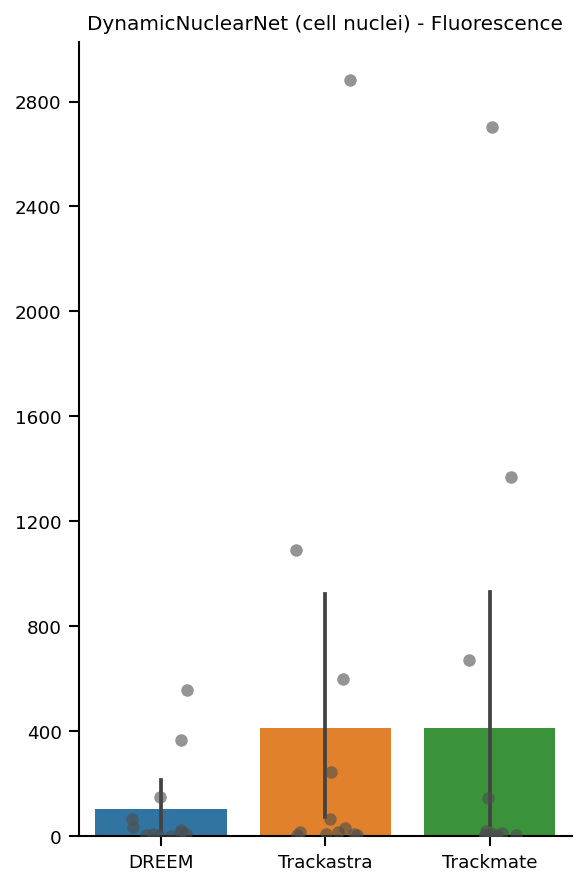

In [38]:
# Create a separate plot for each unique ID
unique_ids = df['id'].unique()

for i in unique_ids:
    data = df[df['id'] == i]
    
    # Create a new figure for each animal
    fig, ax = plt.subplots(figsize=figure_size)
    
    sns.stripplot(x='method', y='value', data=data, color="0.3", alpha=0.6, size=6, jitter=0.2, ax=ax)
    sns.barplot(
        x='method', y='value', data=data,
        palette={
            "DREEM": sns.color_palette("tab10")[0],
            "Trackastra": sns.color_palette("tab10")[1],
            "Trackmate": sns.color_palette("tab10")[2]
            }, 
        ax=ax
    )
    
    ax.set_title(f'{i}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()])
    from matplotlib.ticker import MaxNLocator
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    sns.despine()
    # plt.savefig(f'./data/microscopy-switches-split-chunks-{animal_id}.png', format='png')
    plt.show()

### Animals all MOT Metrics

In [7]:
df = pd.read_csv("./data/animals-motmetrics-all.csv")

### Microscopy all MOT Metrics and CTC metrics

In [5]:
df = pd.read_csv("./data/microscopy-all-metrics.csv")

### Segment lengths

In [9]:
df = pd.read_csv("./data/paired-animals-gt-segment-lengths.csv")

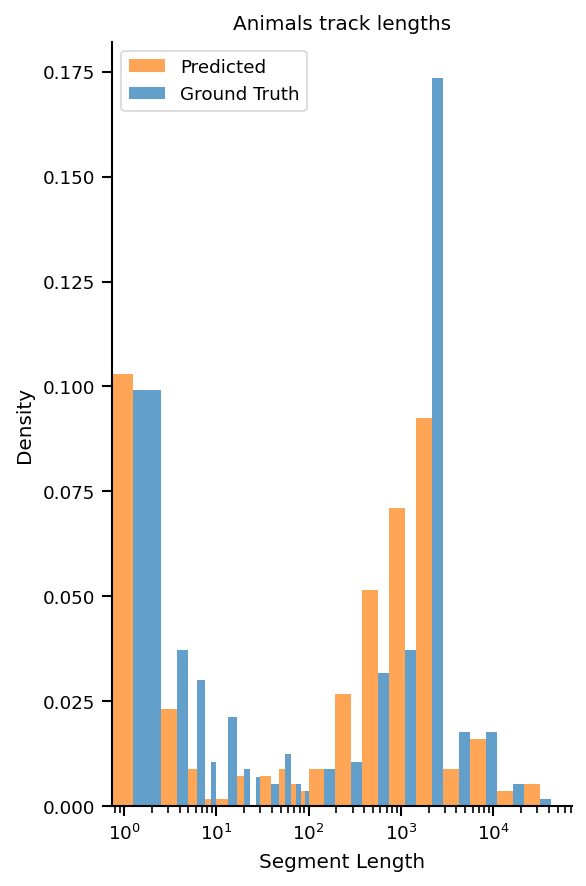

In [11]:
fig1, ax1 = plt.subplots(figsize=figure_size)
bins = np.concatenate([
    np.linspace(0,10,5),
    np.linspace(10,30,4),
    np.linspace(30,100,5),
    np.logspace(2, np.log10(df['segment_length'].max()), 10)
])

# Add histogram for segments_gt_df with a label
g = sns.histplot(data=df[df["segment_length"]>0], x="segment_length", hue="type", bins=bins, 
         alpha=0.7, palette={"Predicted": sns.color_palette("tab20")[2], "Ground Truth": sns.color_palette("tab20")[0]}, 
         ax=ax1, multiple="dodge", edgecolor='none', legend=True, stat='probability')
g.legend_.set_title(None)
ax1.yaxis.get_major_locator().set_params(integer=True)
plt.xscale('log')
ax1.set_xlabel('Segment Length')
ax1.set_ylabel('Density')
ax1.set_title('Animals track lengths')
# ax1.set_ylim(0, 100)
sns.despine()
plt.tight_layout()
# plt.savefig('./data/paired-animals-gt-segment-lengths-custom-scale.png', format='png')
plt.show()

/tmp/ipykernel_4168165/2798286752.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


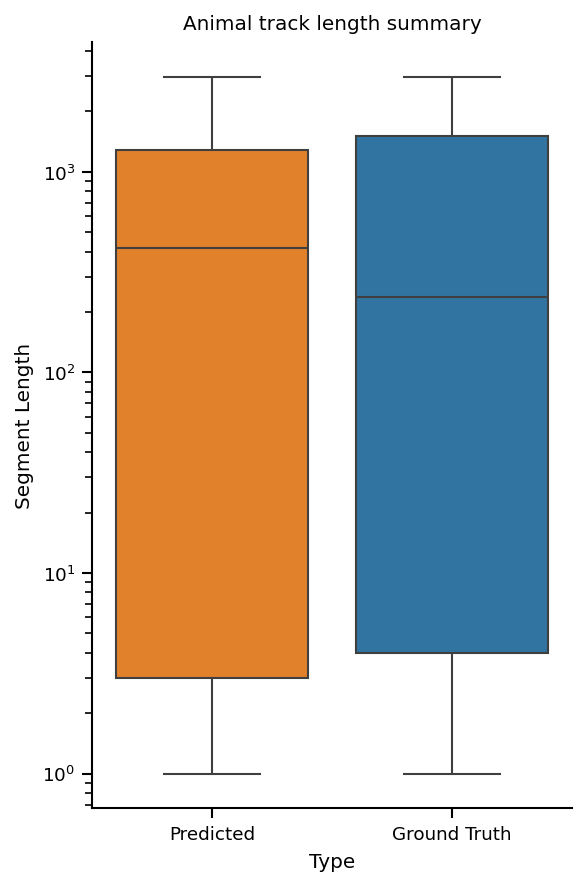

In [13]:
plt.figure(figsize=figure_size)

# Remove outliers using IQR method
Q1 = df['segment_length'].quantile(0.25)
Q3 = df['segment_length'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Filter out outliers
df_filtered = df[
    (df['segment_length'] >= lower_bound) & 
    (df['segment_length'] <= upper_bound)
]

sns.boxplot(
    data=df_filtered,
    x="type",
    y="segment_length",
    palette={"Ground Truth": sns.color_palette("tab10")[0], "Predicted": sns.color_palette("tab10")[1]},
    orient="v",
    log_scale=True
)
plt.xlabel("Type")
plt.ylabel("Segment Length")
plt.title("Animal track length summary")
sns.despine()
plt.tight_layout()
# plt.savefig('./data/summary-paired-animals-gt-segment-lengths.png', format='png')
plt.show()

#### Microscopy segment lengths

In [31]:
df = pd.read_csv("./data/paired-microscopy-gt-segment-lengths.csv")

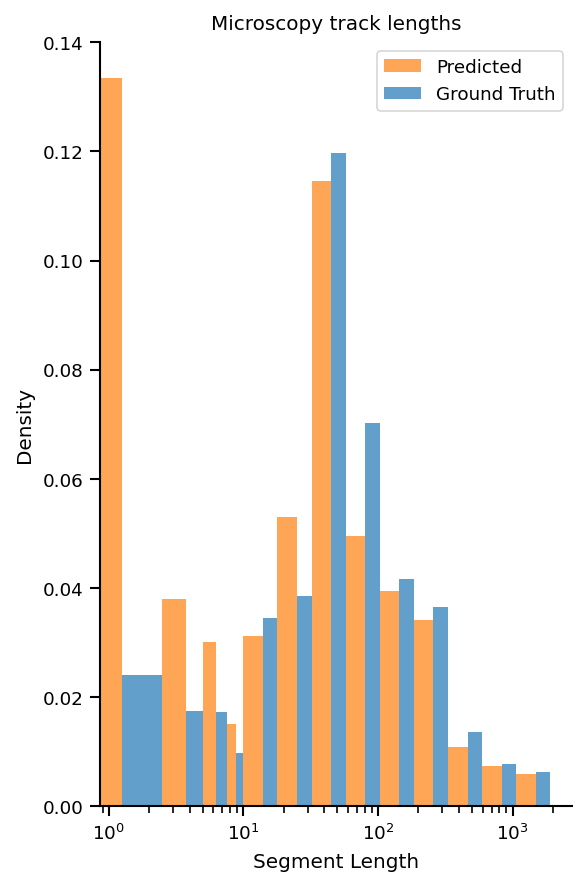

In [20]:
# Create figure with 2 subplots
fig1, ax1 = plt.subplots(figsize=figure_size)
bins = np.concatenate([
    np.linspace(0,10, 5),
    np.logspace(1, np.log10(df['segment_length'].max()), 10)
])
# Add histogram for segments_gt_df with a label
g = sns.histplot(data=df, x="segment_length", hue="type", bins=bins, 
         alpha=0.7, palette={"Predicted": sns.color_palette("tab20")[2], "Ground Truth": sns.color_palette("tab20")[0]}, 
         ax=ax1, multiple="dodge", edgecolor='none', legend=True, stat='probability')
g.legend_.set_title(None)
ax1.yaxis.get_major_locator().set_params(integer=True)
plt.xscale('log')
ax1.set_xlabel('Segment Length')
ax1.set_ylabel('Density')
ax1.set_title('Microscopy track lengths')

sns.despine()
plt.tight_layout()
# plt.savefig('./data/paired-microscopy-gt-segment-lengths.png', format='png')
plt.show()

/tmp/ipykernel_4168165/2475797794.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


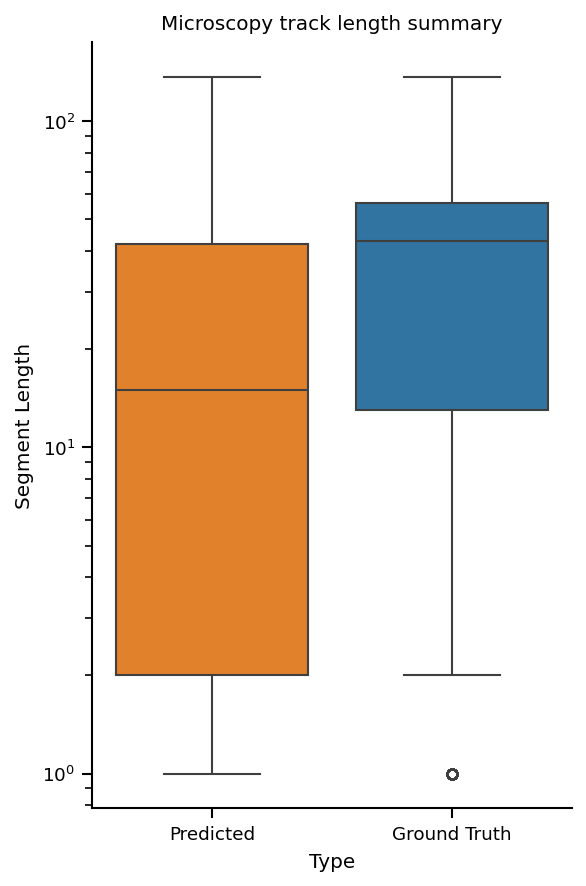

In [ ]:
plt.figure(figsize=figure_size)

# Remove outliers using IQR method
Q1 = df['segment_length'].quantile(0.25)
Q3 = df['segment_length'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Filter out outliers
df_filtered = df[
    (df['segment_length'] >= lower_bound) & 
    (df['segment_length'] <= upper_bound)
]

sns.boxplot(
    data=df_filtered,
    x="type",
    y="segment_length",
    palette={"Ground Truth": sns.color_palette("tab10")[0], "Predicted": sns.color_palette("tab10")[1]},
    orient="v",
    log_scale=True
)
plt.xlabel("Type")
plt.ylabel("Segment Length")
plt.title("Microscopy track length summary")
sns.despine()
plt.tight_layout()
# plt.savefig('./data/summary-paired-microscopy-gt-segment-lengths.png', format='png')
plt.show()

### Switches by instance density, microscopy

In [29]:
df = pd.read_csv("./data/microscopy-switches-by-instance-density-normalized-by-occurrence-error-bars.csv")
df_dots = pd.read_csv("./data/microscopy-switches-by-instance-density-normalized-by-occurrence-error-bars-dots.csv")

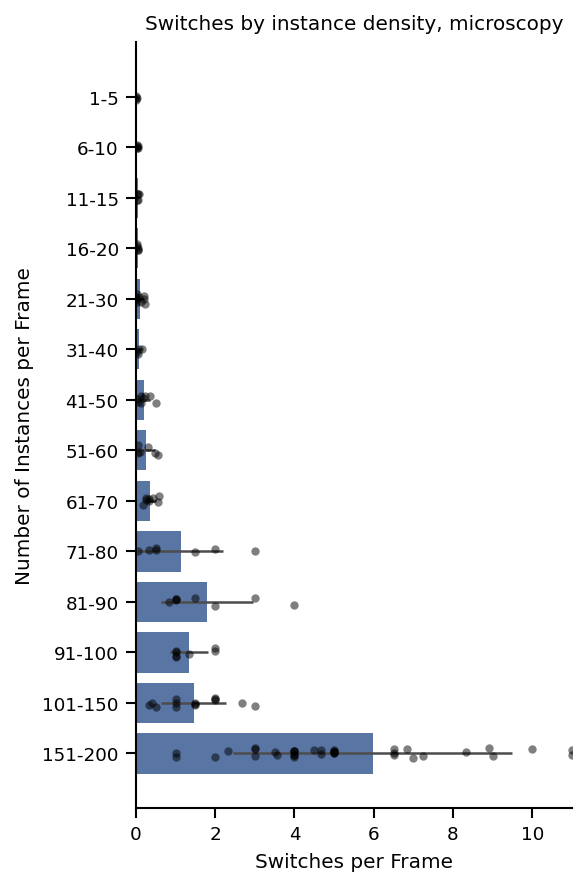

In [ ]:
# Create figure with 2 subplots
fig1, ax1 = plt.subplots(figsize=figure_size)
# Plot the binned data instead
sns.barplot(y='instance_bin', x='switches_per_frame_mean', data=df, ax=ax1, errorbar="se")
# Add a stripplot to show individual data points (axes flipped)
sns.stripplot(
    y='instance_bin', x='switches_per_frame', data=df_dots, ax=ax1, size=4, color='black', alpha=0.5, jitter=True
)
ax1.errorbar(
    y=np.arange(len(df['instance_bin'])),  # Now y is the bin positions
    x=df['switches_per_frame_mean'],
    xerr=df['switches_per_frame_std'],
    fmt='none',  # No connecting line
    ecolor='0.3', capsize=0
)

ax1.set_xticks(range(0, 13, 2))
ax1.set_xlim(0, 11)

ax1.set_ylabel('Number of Instances per Frame')
ax1.set_xlabel('Switches per Frame')
ax1.set_title('Switches by instance density, microscopy')

sns.despine()
plt.tight_layout()
# plt.savefig('./data/microscopy-switches-by-instance-density-xy-flipped-normalized-by-occurrence-error-bars.png', format='png')
plt.show()

### Biological analysis plots

#### Animals

In [32]:
df = pd.read_csv("./data/als-sniffing-distances.csv")

/tmp/ipykernel_4168165/3472470760.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="time", y="distance_cm", hue="method", palette=sns.color_palette("tab10"))


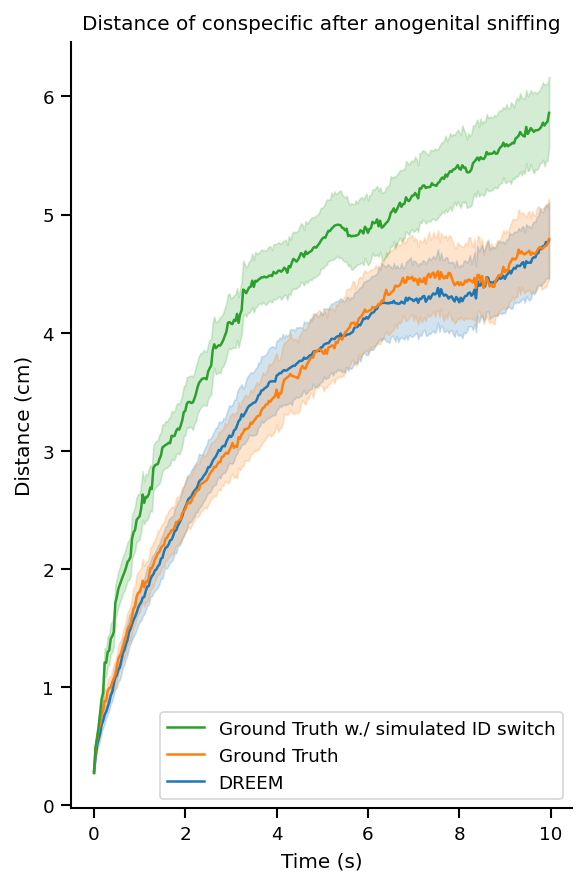

In [34]:
plt.figure(figsize=figure_size)
sns.lineplot(data=df, x="time", y="distance_cm", hue="method", palette=sns.color_palette("tab10"))
plt.title("Distance of conspecific after anogenital sniffing")
plt.xlabel("Time (s)")
plt.ylabel("Distance (cm)")
legend = plt.gca().get_legend()
if legend is not None:
    legend.set_title(None)
# Reorder legend entries
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0]  # Assuming original order is DREEM, Ground Truth, Ground Truth w./ simulated ID switch
plt.legend([handles[i] for i in order], [labels[i] for i in order])
sns.despine()
plt.tight_layout()
# plt.savefig("./data/als-sniffing-distances.png")
plt.show()

In [48]:
df = pd.read_csv("./data/mice-social-interactions-all.csv")

/tmp/ipykernel_4168165/1356209591.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x='Mouse ID', y='Number of Interactions', hue='Interaction Type', palette=sns.color_palette("tab10"))


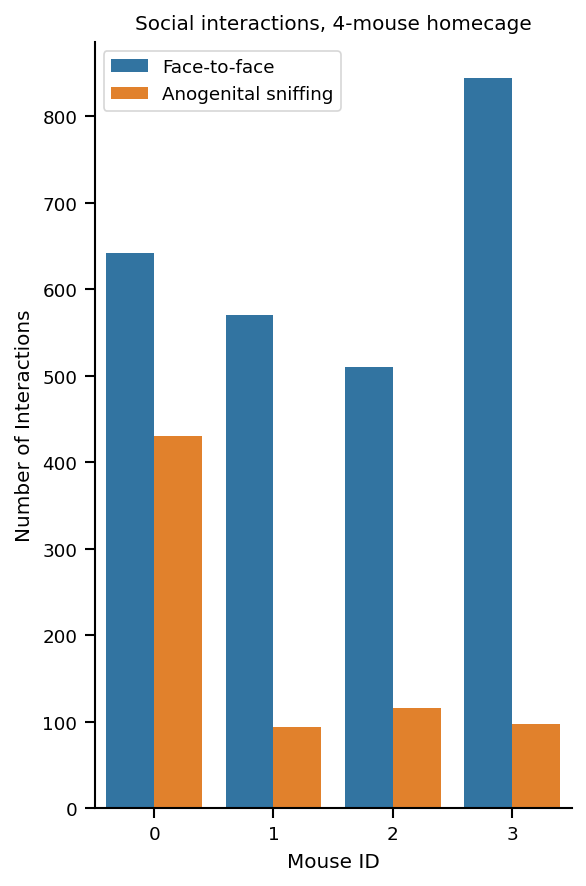

In [50]:
plt.figure(figsize=figure_size)
sns.barplot(data=df, x='Mouse ID', y='Number of Interactions', hue='Interaction Type', palette=sns.color_palette("tab10"))
plt.title('Social interactions, 4-mouse homecage')
sns.despine()
plt.legend()
plt.tight_layout()
# plt.savefig("./data/mice-social-interactions-all.png")

In [52]:
ag_pairs = np.load("./data/mice-ag-sniffs-pairplot.npy")

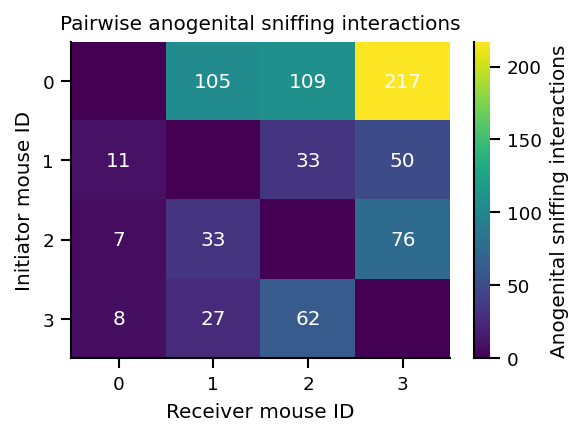

In [55]:
plt.figure(figsize=(4,3))
im = plt.imshow(ag_pairs, cmap='viridis', aspect='auto')
# Remove border from colorbar
plt.colorbar(im, label='Anogenital sniffing interactions').outline.set_visible(False)

plt.xlabel('Receiver mouse ID')
plt.ylabel('Initiator mouse ID')
plt.title('Pairwise anogenital sniffing interactions')
n_mice=4
# Add text annotations for each cell
for i in range(n_mice):
    for j in range(n_mice):
        if i != j:  # Don't annotate diagonal (self-interactions)
            plt.text(j, i, f'{int(ag_pairs[i, j])}', 
                    ha='center', va='center', color='white')

plt.xticks(range(n_mice))
plt.yticks(range(n_mice))
plt.tight_layout()
sns.despine()
# plt.savefig("./data/mice-ag-sniffs-pairplot.png")
plt.show()

In [56]:
h2h_pairs = np.load("./data/mice-h2h-pairplot.npy")

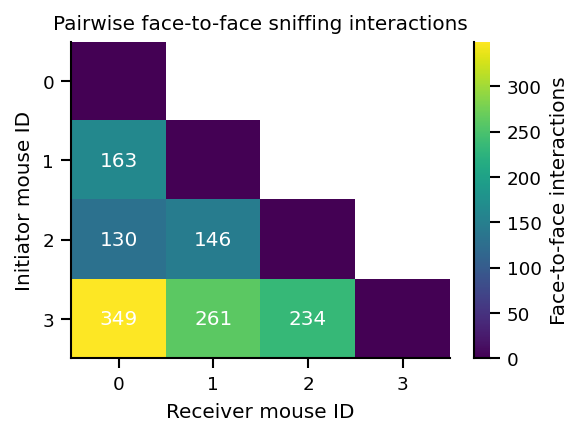

In [60]:
plt.figure(figsize=(4,3))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(h2h_pairs), k=1)
# Apply the mask to the matrix
masked_matrix = np.ma.masked_array(h2h_pairs, mask=mask)
im = plt.imshow(masked_matrix, cmap='viridis', aspect='auto')
# Remove border from colorbar
plt.colorbar(im, label='Face-to-face interactions').outline.set_visible(False)

plt.xlabel('Receiver mouse ID')
plt.ylabel('Initiator mouse ID')
plt.title('Pairwise face-to-face sniffing interactions')
n_mice=4
# Add text annotations for each cell
for i in range(n_mice):
    for j in range(n_mice):
        if i != j:  # Don't annotate diagonal (self-interactions)
            plt.text(j, i, f'{int(h2h_pairs[i, j])}', 
                    ha='center', va='center', color='white')

plt.xticks(range(n_mice))
plt.yticks(range(n_mice))
plt.tight_layout()
sns.despine()
# plt.savefig("./data/mice-h2h-pairplot.png")
plt.show()

#### Supplement figure

In [35]:
df = pd.read_csv("./data/als-sniffing-distances-heatmap.csv")

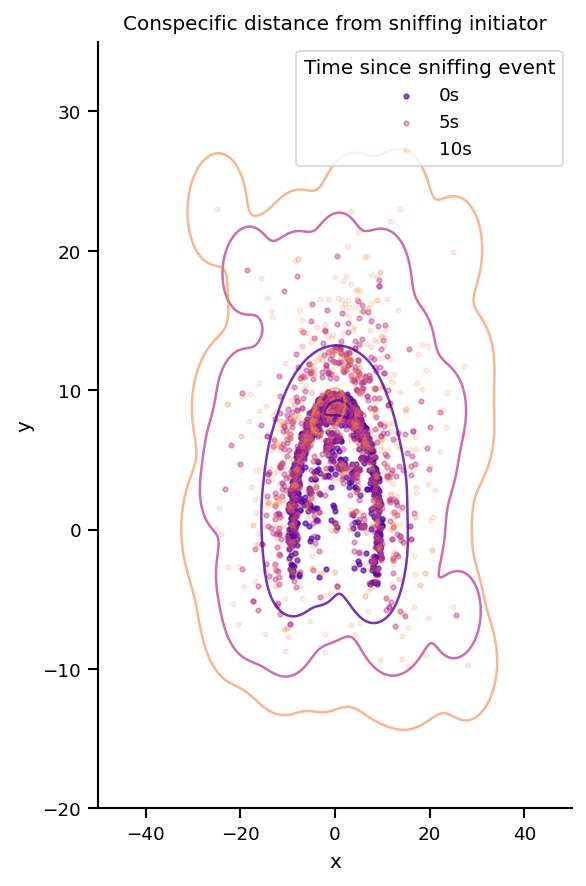

In [37]:
fig, axes = plt.subplots(1, 1, figsize=figure_size)
times = [0,5,10]

for i, t_val in enumerate(times):
    df = df[df['method'] == "DREEM"]
    df_t = df[df['time'] == t_val]
    # Remove outliers using IQR method
    Q1 = df_t[['x', 'y']].quantile(0.25)
    Q3 = df_t[['x', 'y']].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    
    # Filter out outliers
    df_t = df_t[((df_t['x'] >= lower_bound['x']) & (df_t['x'] <= upper_bound['x']) &
                 (df_t['y'] >= lower_bound['y']) & (df_t['y'] <= upper_bound['y']))]
    X = df_t[['x', 'y']].values
    # Plot the data
    alpha = 0.9-0.25*(i+1)
    axes.scatter(X[:, 0], X[:, 1], s=5, alpha=alpha, label=f"{str(t_val)}s", color=sns.color_palette("plasma")[i*2])
    # Plot contour around 90th percentile probability region
    sns.kdeplot(data=df_t, x="x", y="y", levels=[0.001, 0.95], fill=False, alpha=0.9-0.1*(i+1), ax=axes, color=sns.color_palette("plasma")[i*2])
    axes.set_xlim(-50,50)
    axes.set_ylim(-20,35)
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.legend(title="Time since sniffing event")
plt.title("Conspecific distance from sniffing initiator")
sns.despine()
plt.tight_layout()
# plt.savefig("./data/als-sniffing-distances-heatmap.png")
plt.show()

#### Microscopy

In [38]:
df = pd.read_csv("./data/track_metrics_summary.csv")

/tmp/ipykernel_4168165/3963685908.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked = df.groupby(['condition', 'is_moving']).size().unstack(fill_value=0)


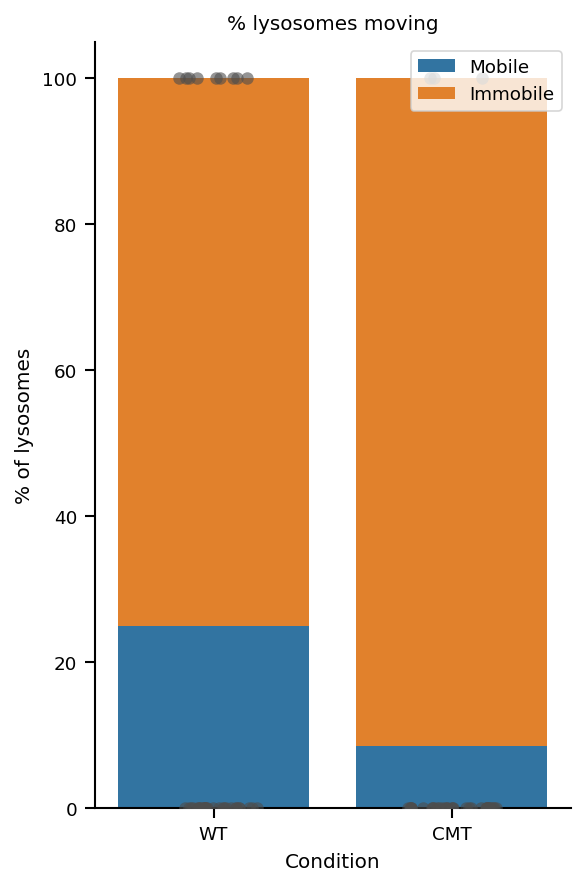

In [39]:

df['is_moving'] = df['net_displacement'] > 2.0

plt.figure(figsize=figure_size)
# Reorder the data to plot WT first, then CMT
df['condition'] = pd.Categorical(df['condition'], categories=['wt', 'cmt'], ordered=True)
df = df.sort_values('condition')
df['condition'] = df['condition'].map({"wt": "WT", "cmt": "CMT"})
df['moving_100_scale'] = df['is_moving'] * 100
sns.stripplot(x='condition', y='moving_100_scale', data=df, color="0.3", alpha=0.6, size=6, jitter=0.2)
stacked = df.groupby(['condition', 'is_moving']).size().unstack(fill_value=0)
bottom = None
stacked = stacked.div(stacked.sum(axis=1), axis=0) * 100  # Convert to percentages
colors = [sns.color_palette("tab10")[0], sns.color_palette("tab10")[1]]  # You can choose your own colors
for idx, val in enumerate([True, False]):
    sns.barplot(
        x=stacked.index,
        y=stacked[val],
        bottom=stacked[True] if val is False else None,
        label="Mobile" if val is True else "Immobile",
        color=colors[idx],
    )
plt.xlabel("Condition")
plt.legend(title="is_moving", loc="upper right")
plt.title("% lysosomes moving")
legend = plt.gca().get_legend()
if legend is not None:
    legend.set_title(None)
sns.despine()
plt.tight_layout()
plt.xlabel("Condition")
plt.ylabel("% of lysosomes")
# plt.savefig("./data/percent_moving.png")
plt.show()

/tmp/ipykernel_4168165/3378592735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="condition", y="confinement_ratio", palette=sns.color_palette("tab10"))
/tmp/ipykernel_4168165/3378592735.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x="condition", y="confinement_ratio", palette=sns.color_palette("tab10"))


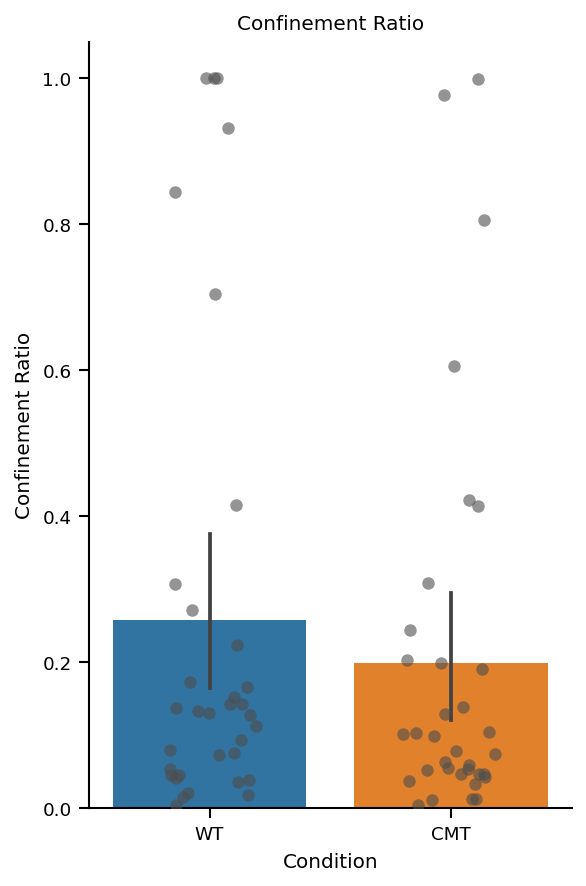

In [ ]:
df = pd.read_csv("./data/track_metrics_summary.csv")
df['is_moving'] = df['net_displacement'] > 2.0

plt.figure(figsize=figure_size)
# Reorder the data to plot WT first, then CMT
df['condition'] = pd.Categorical(df['condition'], categories=['wt', 'cmt'], ordered=True)
df = df.sort_values('condition')
df['condition'] = df['condition'].map({"wt": "WT", "cmt": "CMT"})
sns.stripplot(x='condition', y='confinement_ratio', data=df, color="0.3", alpha=0.6, size=6, jitter=0.2)
sns.barplot(data=df, x="condition", y="confinement_ratio", palette=sns.color_palette("tab10"))
plt.xlabel("Condition")
plt.ylabel("Confinement Ratio")
plt.title("Confinement Ratio")
legend = plt.gca().get_legend()
if legend is not None:
    legend.set_title(None)
sns.despine()
plt.tight_layout()
# plt.savefig("./data/confinement_ratio.png")
plt.show()

/tmp/ipykernel_4168165/4267992113.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="condition", y="mean", palette=sns.color_palette("tab10"))
/tmp/ipykernel_4168165/4267992113.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x="condition", y="mean", palette=sns.color_palette("tab10"))


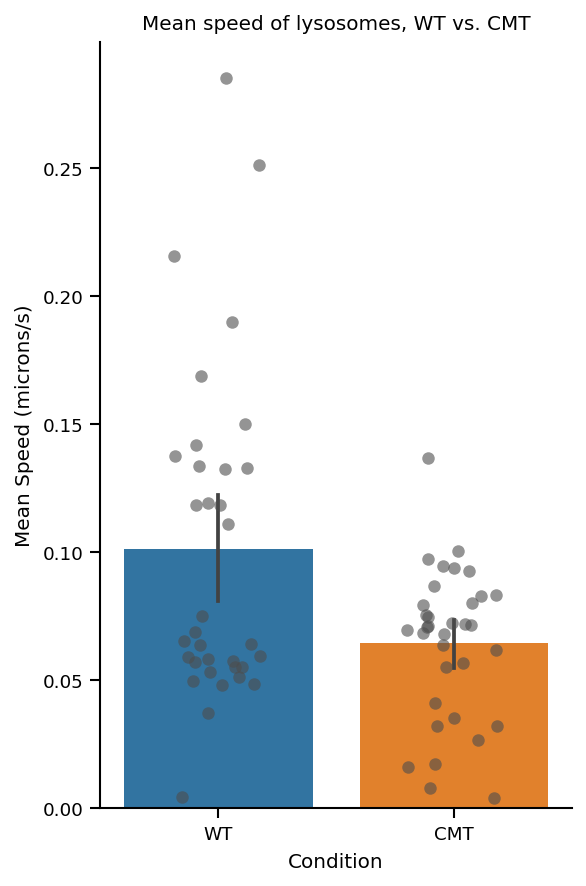

In [44]:
df = pd.read_csv("./data/track_metrics_summary.csv")
plt.figure(figsize=figure_size)
# Reorder the data to plot WT first, then CMT
df['condition'] = pd.Categorical(df['condition'], categories=['wt', 'cmt'], ordered=True)
df = df.sort_values('condition')
df['condition'] = df['condition'].map({"wt": "WT", "cmt": "CMT"})
sns.stripplot(x='condition', y='mean', data=df, color="0.3", alpha=0.6, size=6, jitter=0.2)
sns.barplot(data=df, x="condition", y="mean", palette=sns.color_palette("tab10"))
plt.title("Mean speed of lysosomes, WT vs. CMT")
plt.xlabel("Condition")
plt.ylabel("Mean Speed (microns/s)")
legend = plt.gca().get_legend()
if legend is not None:
    legend.set_title(None)
sns.despine()
plt.tight_layout()
# plt.savefig("./data/mean-speed.png")
plt.show()